In [1]:
import pandas as pd
from numpy import std, mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('diagnosis.data',sep='\t',encoding='utf-16',header=None,names=["Temperature","Nausea","Lumbar Pain",
                                                                                 "Urine Pushing","Micturition pains","Burning","Inflammation","Nephritis"])


def temperature(temperature):
    if ',' in temperature:
        temperature=temperature.replace(',','.')
    return temperature

data["Temperature"]=data.apply(lambda row:temperature(row["Temperature"]),axis=1)

data['Temperature']=data['Temperature'].astype('float')

def boolean_conv(info):
    if info=='no':
        info=0
    else:
        info=1
    return info


data["Nausea"]=data.apply(lambda row:boolean_conv(row["Nausea"]),axis=1)
data["Lumbar Pain"]=data.apply(lambda row:boolean_conv(row["Lumbar Pain"]),axis=1)
data["Urine Pushing"]=data.apply(lambda row:boolean_conv(row["Urine Pushing"]),axis=1)
data["Micturition pains"]=data.apply(lambda row:boolean_conv(row["Micturition pains"]),axis=1)
data["Burning"]=data.apply(lambda row:boolean_conv(row["Burning"]),axis=1)
data["Inflammation"]=data.apply(lambda row:boolean_conv(row["Inflammation"]),axis=1)
data["Nephritis"]=data.apply(lambda row:boolean_conv(row["Nephritis"]),axis=1)



def addColumn(nephritis, inflamation):
    onlyNephritis=[0 for i in range(len(nephritis))]
    onlyInflamation=[0 for i in range(len(nephritis))]
    bothNephritisAndInflamation=[0 for i in range(len(nephritis))]
    none=[0 for i in range(len(nephritis))]
    for i in range(len(nephritis)):
        if nephritis[i]==1 and inflamation[i]==1:
            bothNephritisAndInflamation[i]=1
        elif nephritis[i]==0 and inflamation[i]==1:
            onlyInflamation[i]=1
        elif nephritis[i]==1 and inflamation[i]==0:
            onlyNephritis[i]=1
        else:
            none[i]=1
    return (onlyNephritis, onlyInflamation, bothNephritisAndInflamation, none)
        
            



In [3]:
(onlyNephritis, onlyInflamation, bothNephritisAndInflamation, none) = addColumn(data["Nephritis"], data["Inflammation"])
data["onlyNephritis"]=onlyNephritis
data["onlyInflammation"]=onlyInflamation
data["bothNephritisAndInflamation"]=bothNephritisAndInflamation
data["none"]=none

data=data.drop(["Nephritis", "Inflammation"], axis = 1)

X = data[['Temperature', 'Nausea', 'Lumbar Pain', 'Urine Pushing', 'Micturition pains', 'Burning']]
y = data[data.columns[6:10]]

y=y.to_numpy()

y = (y == 1).argmax(axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
important_features_dict = {}
for idx, val in enumerate(random_forest_classifier.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
print("Features from most important to least")
for i in important_features_list:
    print(X_train.columns[i])

importance_df = pd.DataFrame({'feature_labels': X_train.columns,
                              'means' : perm_importance['importances_mean'],
                              'stds' : perm_importance['importances_std']})

Features from most important to least
Urine Pushing
Temperature
Lumbar Pain
Micturition pains
Nausea
Burning


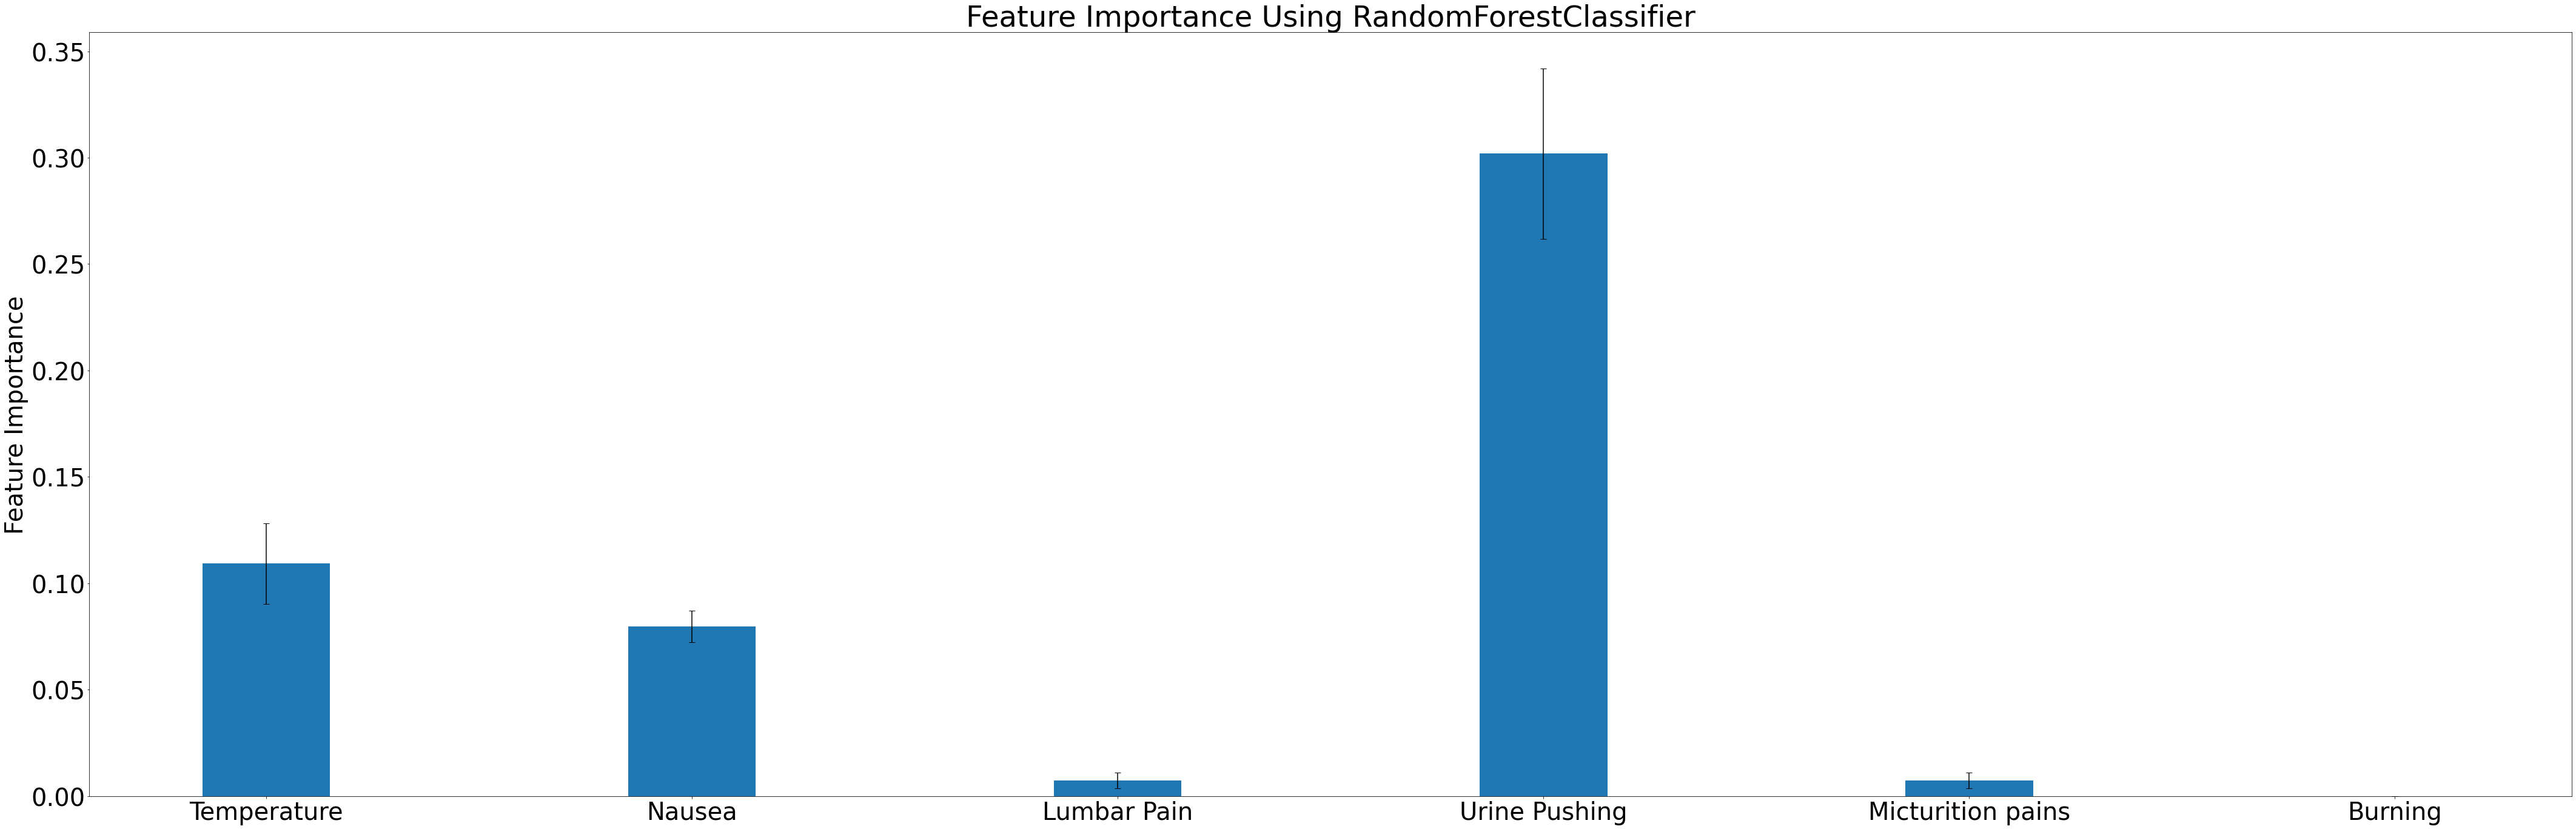

In [12]:
import numpy as np

plt.rcParams.update({'font.size': 40})
plt.rcParams["figure.figsize"] = (60,20)
fig, ax = plt.subplots()
x = np.arange(len(importance_df))
width = 0.3
rects1 = ax.bar(x, height = importance_df['means'], width = width, 
                yerr = importance_df['stds'], align='center', ecolor='black', 
                capsize=5)
ax.set_ylabel('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(importance_df['feature_labels'])
ax.set_title('Feature Importance Using RandomForestClassifier')
plt.tight_layout()
